In [ ]:
import os
import numpy as np
import cv2  # OpenCV library for image processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

# Define the path to the dataset
base_dir = '/content/drive/MyDrive/ImageC'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each subdirectory (class folder)
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                image = cv2.resize(image, (32, 32))  # Resize image to 32x32
                images.append(image)
                labels.append(class_name)

In [ ]:
batch_size = 32
img_height = 180
img_width = 120

train_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.26,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 620 files belonging to 3 classes.
Using 459 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.26,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 620 files belonging to 3 classes.
Using 161 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['Lajthiza', 'Qafshtama', 'Tepelene']


Found 460 images belonging to 3 classes.
Found 160 images belonging to 3 classes.


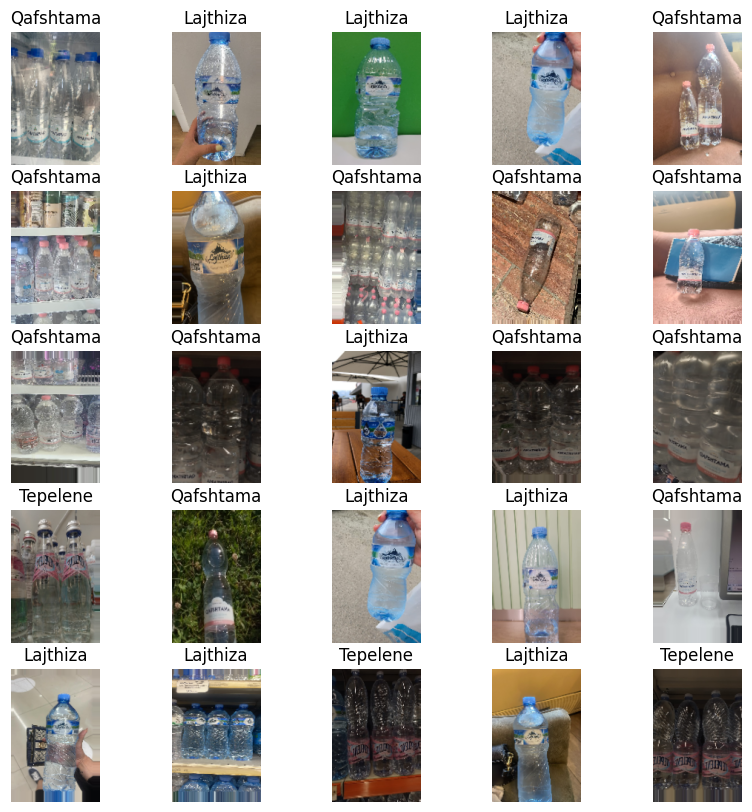

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Konfigurimi i ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalizimi i pikselëve të imazheve
    shear_range=0.2,           # Aplikimi i transformimeve shearing
    zoom_range=0.2,            # Aplikimi i zmadhimeve rastësore
    horizontal_flip=True,      # Aplikimi i flip horizontal të imazheve
    validation_split=0.26       # Ndarja e të dhënave për validim
)

# Krijimi i train_generator dhe validation_generator
train_generator = datagen.flow_from_directory(
    base_dir,           # Direktorinë kryesore ku ndodhen imazhet
    target_size=(180, 120),    # Madhësia e imazheve pas ndryshimit të përmasave
    batch_size=32,             # Madhësia e grupit të të dhënave
    class_mode='categorical',  # Modaliteti i klasifikimit
    subset='training'          # Përdor subsetin për trajnimin
)

validation_generator = datagen.flow_from_directory(
    base_dir,           # Direktorinë kryesore ku ndodhen imazhet
    target_size=(180, 120),    # Madhësia e imazheve pas ndryshimit të përmasave
    batch_size=32,             # Madhësia e grupit të të dhënave
    class_mode='categorical',  # Modaliteti i klasifikimit
    subset='validation'        # Përdor subsetin për validim
)

# Emrat e klasave
class_names = list(train_generator.class_indices.keys())

# Marrja e një grupi imazhesh nga train_generator
images, labels = next(train_generator)

# Shfaqja e disa imazheve
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])
    plt.axis("off")

plt.show()


In [ ]:
# Convert lists to numpy arrays
x_data = np.array(images)
y_data = np.array(labels)

# Encode labels as integers
le = LabelEncoder()
y_data = le.fit_transform(y_data)

# Normalize the images
x_data = x_data / 255.0

# Reshape data to include channel dimension
x_data = x_data.reshape(-1, 32, 32, 1)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


ValueError: y should be a 1d array, got an array of shape (32, 3) instead.

In [ ]:
model_dense = Sequential([
    Flatten(input_shape=(32, 32, 1)),  # Përshtat dimensionin e input-it për Dense layers
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_dense.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 1024)              0         
                                                                 
 dense_87 (Dense)            (None, 512)               524800    
                                                                 
 dense_88 (Dense)            (None, 256)               131328    
                                                                 
 dense_89 (Dense)            (None, 128)               32896     
                                                                 
 dense_90 (Dense)            (None, 10)                1290      
                                                                 
Total params: 690314 (2.63 MB)
Trainable params: 690314 (2.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
16/16 [==============================] - 3s 79ms/step - loss: 1.2680 - accuracy: 0.3831 - val_loss: 1.2624 - val_accuracy: 0.4274
Epoch 2/100
16/16 [==============================] - 0s 23ms/step - loss: 1.0526 - accuracy: 0.4617 - val_loss: 1.0382 - val_accuracy: 0.4597
Epoch 3/100
16/16 [==============================] - 0s 30ms/step - loss: 1.0400 - accuracy: 0.4778 - val_loss: 0.9743 - val_accuracy: 0.5565
Epoch 4/100
16/16 [==============================] - 0s 28ms/step - loss: 0.8878 - accuracy: 0.6250 - val_loss: 0.8678 - val_accuracy: 0.5484
Epoch 5/100
16/16 [==============================] - 1s 38ms/step - loss: 0.8286 - accuracy: 0.6411 - val_loss: 0.8551 - val_accuracy: 0.6129
Epoch 6/100
16/16 [==============================] - 1s 35ms/step - loss: 0.7199 - accuracy: 0.7157 - val_loss: 0.7329 - val_accuracy: 0.6935
Epoch 7/100
16/16 [==============================] - 1s 42ms/step - loss: 0.7011 - accuracy: 0.7339 - val_loss: 0.8155 - val_accuracy: 0.5565
Epoch 

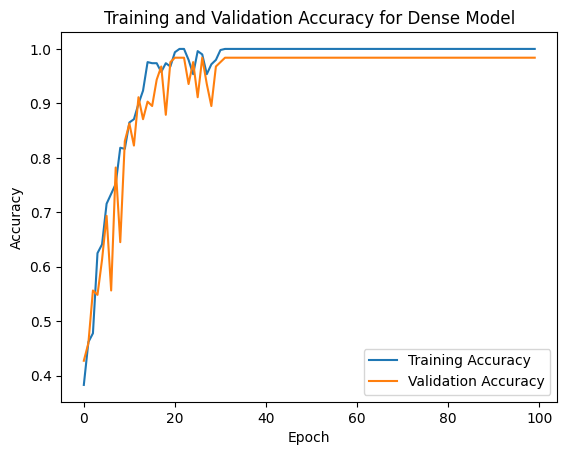

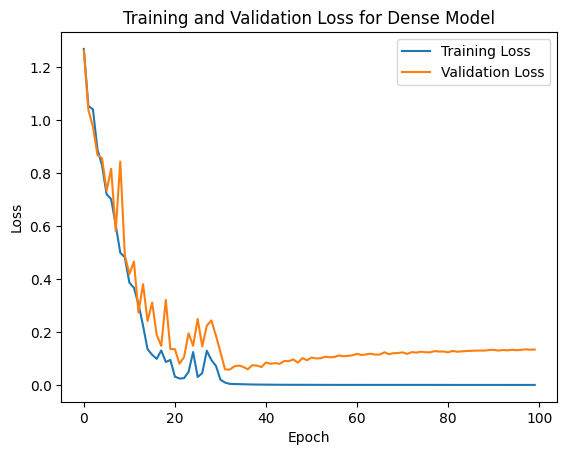

In [ ]:
# Kompilimi i modelit
model_dense.compile(optimizer=Adam(),
                    loss=SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])

# Trajnimi i modelit
history_dense = model_dense.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

# Vizualizimi i saktësisë së trajnimit dhe vlefshmërisë për modelin Dense
plt.plot(history_dense.history['accuracy'], label='Training Accuracy')
plt.plot(history_dense.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Dense Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Vizualizimi i humbjes (loss) gjatë trajnimit dhe vlefshmërisë për modelin Dense
plt.plot(history_dense.history['loss'], label='Training Loss')
plt.plot(history_dense.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Dense Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# Modeli me shtresa Dense dhe Convolutional
model_conv = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_conv.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 2304)              0         
                                                                 
 dense_91 (Dense)            (None, 128)             

Epoch 1/100
16/16 [==============================] - 3s 60ms/step - loss: 1.3879 - accuracy: 0.3185 - val_loss: 1.0818 - val_accuracy: 0.3629
Epoch 2/100
16/16 [==============================] - 1s 37ms/step - loss: 1.0639 - accuracy: 0.4516 - val_loss: 1.0935 - val_accuracy: 0.4355
Epoch 3/100
16/16 [==============================] - 1s 41ms/step - loss: 1.0153 - accuracy: 0.5222 - val_loss: 0.9848 - val_accuracy: 0.4758
Epoch 4/100
16/16 [==============================] - 1s 69ms/step - loss: 0.9612 - accuracy: 0.5383 - val_loss: 1.0365 - val_accuracy: 0.5645
Epoch 5/100
16/16 [==============================] - 1s 66ms/step - loss: 0.9712 - accuracy: 0.5464 - val_loss: 1.0375 - val_accuracy: 0.5000
Epoch 6/100
16/16 [==============================] - 1s 73ms/step - loss: 0.8764 - accuracy: 0.6210 - val_loss: 0.8815 - val_accuracy: 0.6210
Epoch 7/100
16/16 [==============================] - 1s 73ms/step - loss: 0.7804 - accuracy: 0.6552 - val_loss: 0.7814 - val_accuracy: 0.6371
Epoch 

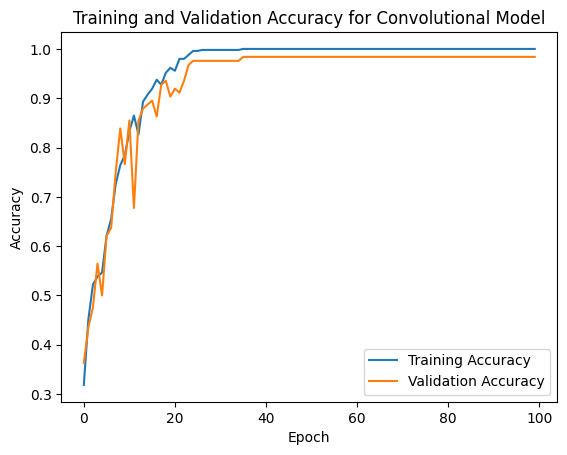

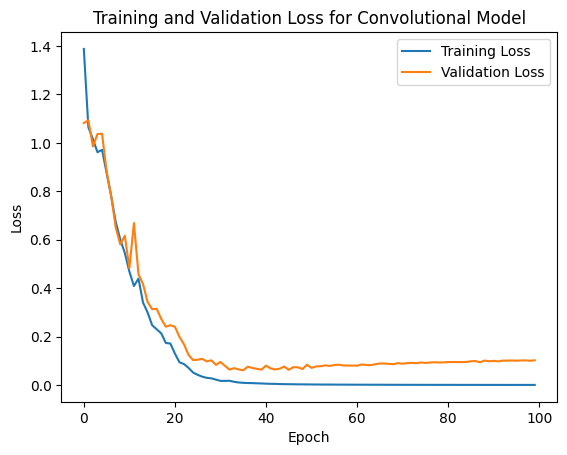

In [ ]:
# Kompilimi i modelit
model_conv.compile(optimizer=Adam(),
                   loss=SparseCategoricalCrossentropy(),
                   metrics=['accuracy'])

# Trajnimi i modelit
history_conv = model_conv.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

# Vizualizimi i saktësisë së trajnimit dhe vlefshmërisë për modelin Dense dhe Convolutional
plt.plot(history_conv.history['accuracy'], label='Training Accuracy')
plt.plot(history_conv.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Convolutional Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Vizualizimi i humbjes (loss) gjatë trajnimit dhe vlefshmërisë për modelin Dense dhe Convolutional
plt.plot(history_conv.history['loss'], label='Training Loss')
plt.plot(history_conv.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Convolutional Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

import numpy as np

# Ngarkimi i modelit të parapërgatitur
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Kopjoni imazhet nga një kanal në tre kanale
x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_val_rgb = np.repeat(x_val, 3, axis=-1)

# Shtimi i shtresave të reja
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Definimi i modelit të plotë
model_pretrained = Model(inputs=base_model.input, outputs=predictions)

# Ngulfatimi i shtresave të modelit bazë
for layer in base_model.layers:
    layer.trainable = False

# Kompilimi i modelit
model_pretrained.compile(optimizer=Adam(),
                         loss=SparseCategoricalCrossentropy(),
                         metrics=['accuracy'])


Epoch 1/30
16/16 [==============================] - 10s 545ms/step - loss: 1.9537 - accuracy: 0.2500 - val_loss: 1.1546 - val_accuracy: 0.4919
Epoch 2/30
16/16 [==============================] - 6s 388ms/step - loss: 1.2621 - accuracy: 0.3770 - val_loss: 1.0701 - val_accuracy: 0.4355
Epoch 3/30
16/16 [==============================] - 9s 552ms/step - loss: 1.1072 - accuracy: 0.4435 - val_loss: 1.0394 - val_accuracy: 0.4758
Epoch 4/30
16/16 [==============================] - 6s 388ms/step - loss: 1.0249 - accuracy: 0.4960 - val_loss: 1.0043 - val_accuracy: 0.5161
Epoch 5/30
16/16 [==============================] - 9s 553ms/step - loss: 1.0178 - accuracy: 0.5101 - val_loss: 0.9637 - val_accuracy: 0.5484
Epoch 6/30
16/16 [==============================] - 6s 391ms/step - loss: 0.9674 - accuracy: 0.5383 - val_loss: 0.9414 - val_accuracy: 0.5645
Epoch 7/30
16/16 [==============================] - 9s 600ms/step - loss: 0.9234 - accuracy: 0.5383 - val_loss: 0.9144 - val_accuracy: 0.5806
Epoch

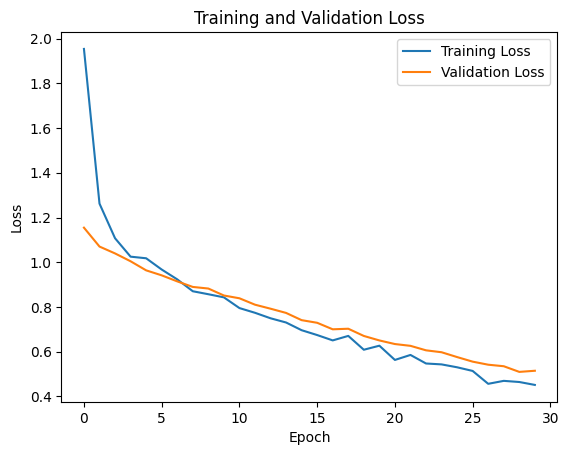

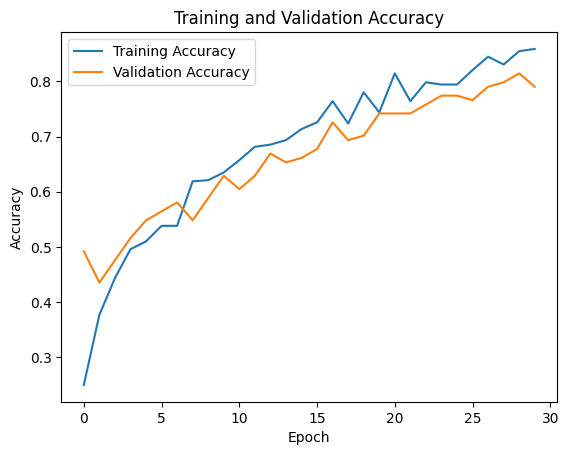

In [ ]:
# Trajnimi i modelit
history_pretrained = model_pretrained.fit(x_train_rgb, y_train, epochs=30, validation_data=(x_val_rgb, y_val))

# Vizualizimi i humbjes (loss) dhe saktësisë (accuracy)
plt.plot(history_pretrained.history['loss'], label='Training Loss')
plt.plot(history_pretrained.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_pretrained.history['accuracy'], label='Training Accuracy')
plt.plot(history_pretrained.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
